In [14]:
rm(list=ls())
library(KoNLP) 
library(wordcloud)
library(Rfacebook)

#contrib01.  install.packages() + library(), pacman이라는 패키지를 추가합니다.
if (!require("pacman")) {install.packages("pacman")}
#contrib02. 특정 라이브러리의 패키지만을 불러올 수 있습니다.
pacman::p_load_gh(
  "trinker/qdap")

In [15]:
facebook_crawling <- function(token, page, output) {
  # ABC News 페이스북 데이터 수집
  facebookData <- getPage(page, token, n=100)
  # ABC News 뉴스피드 데이터를 파일에 저장
  write(facebookData$message, output)
}

In [16]:
# ABC News 페이지에서 데이터 수집
page <- "ABCNews" 		       # ABC News 페이지 ID
token <- "EAACEdEose0cBAHvlIZCfv46ITtZByAgzblnHMaNbhZCnLm0uUgdtKc0xwABMFqO6yIuZBK0crgNidl2pTOt9ZBVa1PXZCpVOZBepZC6C3Rkbq6ypFmjP2AeYJgKaZCdsmVumDnwHgI5TyXRp9W8fVYkbiFYsje8mcbXQLOcUfcZCYcksfGlOFlgdRXOJNBzZCQbAfEZD"	# 페이스북 개발자 토큰

output <- "abcnews_fb_data.txt"	# 저장할 결과 파일 이름 

In [17]:
facebook_crawling(token, page, output)

25 posts 50 posts 75 posts 100 posts 

In [18]:
# 텍스트마이닝을 이용한 데이터 정제 및 분석

## 1) 페이스북 데이터 읽어오기
facebookPosts <- readLines(output)
## 2) NA 데이터 제거
facebookPosts <- facebookPosts[!is.na(facebookPosts)]
## 3) 명사 추출
facebookWords <- sapply(facebookPosts,extractNoun,USE.NAMES=F)
## 4) 특수문자, 숫자, 공백, 불필요한 단어 제거
interest<-gsub("[[:punct:][:digit:][:space:]]", "", unlist(facebookWords))

In [19]:
#contrib03-1 stopwords가 제외된 단어만을 추출합니다. tm=text mining rm: remove
sub_interest<-rm_stopwords(interest, stopwords = tm::stopwords("english"))
sub_interest<-unlist(sub_interest)
#contrib03-2 stopwords들의 목록은 이하를 통해 볼 수 있습니다.
library(tm)
stopwords(kind = 'en')
print(length(stopwords(kind='en')))#174개

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

[1] 174


In [20]:
# 5) 단어길이 3개 보다 큰 단어만 통과
#contrib04 namespace collision으로 인해 문제가 발생할 경우, 아래와 같이 수정합니다.
#요게 찾기 힘들더군요... 날밤을 새야 했습니다.
sub_interest <- base::Filter(function(x) {nchar(x) > 3}, sub_interest)

sub_interest
     abcn     https     trump    donald      pres      says     north president 
       34        32        26        19        15        15        14        13 
  meeting      will     house      year    korean      news     state     white 
       11        10         9         9         8         8         7         7 
     home      jong     korea    letter    police    summit      week     found 
        6         6         6         6         6         6         6         5 
     just      past     three according   earlier    former 
        5         5         5         4         4         4 

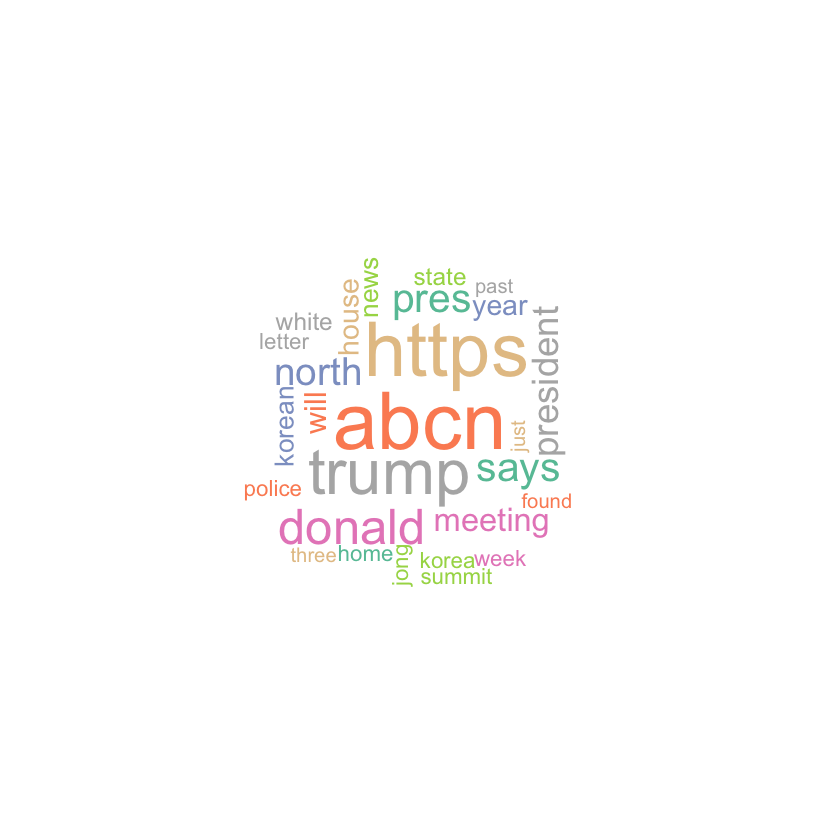

In [21]:
# 6) 데이터 빈도 분석
word_count <- table(sub_interest)
#word_count <- table(interest)
head(sort(word_count, decreasing = T), 30)

# 분석 결과 저장 및 시각화
write.table(sort(word_count, decreasing = T), file = "abcnews_interest.txt")
# [조건] 최소 빈도수 15 이상인 단어를 워드클라우드로 시각화
palette <- brewer.pal(8, "Set2")
wordcloud(names(word_count), freq=word_count, rot.per = 0.25, min.freq = 5, random.order = F, random.color = T, colors = palette)